<a href="https://colab.research.google.com/github/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/blob/main/EDA_team_blancpainTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DMML TEAM BLANCPAIN



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

##**Data Importation and visualization**

### **Load Data**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/training_data.csv')

df_test = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/test_data.csv')

df_sample = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/sample_submission.csv')

Train Model 

In [3]:
df_train.head(10)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
5,6669,landslide,Scotland,FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...,1
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0
9,9586,thunder,NaN,The thunder shook my house woke my sister and ...,1


In [4]:
print("There are {0} rows and {1} columns in the train dataset.".format(df_train.shape[0],df_train.shape[1]))


There are 6471 rows and 5 columns in the train dataset.


Test Model

In [5]:
df_test.head(10)

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball
5,10020,twister,NaN,Brain twister let drop up telly structuring ca...
6,8676,sinkhole,"San Diego, CA",RT twit_san_diego 'Possible sinkhole disrupts ...
7,3131,debris,NaN,Aircraft debris found on island is from MH370 ...
8,2195,catastrophic,"Dublin, Ireland",'Kessler Syndrome' is the name for the catastr...
9,3484,derailed,DC,So a train derailed and instead of me getting ...


In [6]:
print("There are {0} rows and {1} columns in the test dataset.".format(df_test.shape[0],df_test.shape[1]))


There are 1142 rows and 4 columns in the test dataset.


### Missing values:

In [7]:
missingTrain = df_train.isnull().sum(axis = 0)
print(missingTrain)
#missing_train.plot.bar(x='lab', y='val', rot=0, color='plum', title='Missing Values in Train set')

id             0
keyword       55
location    2141
text           0
target         0
dtype: int64


In [8]:
missingTest = df_test.isnull().sum(axis = 0)
print(missingTest)
#missing_test.plot.bar(x='lab', y='val', rot=0, color='lightblue', title='Missing Values in Test set')

id            0
keyword       6
location    392
text          0
dtype: int64


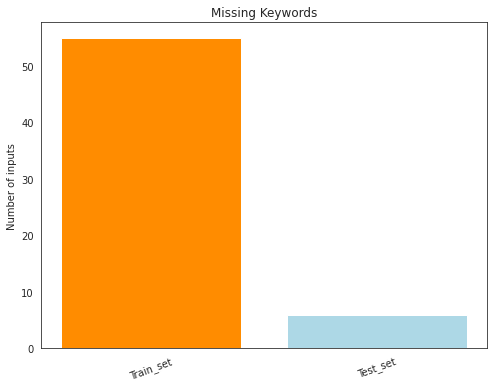

In [9]:
missingKeywordsTrain = df_train.keyword.isnull().sum(axis = 0)
missingKeywordsTest = df_test.keyword.isnull().sum(axis = 0)

#plot NaN proportion for Keyword
plt.rcParams['figure.figsize'] = (8, 6)
x = np.arange(2)
plt.bar(x,[missingKeywordsTrain, missingKeywordsTest], color=['darkorange','lightblue'])
plt.ylabel('Number of inputs')
plt.title('Missing Keywords')
plt.xticks(x, ('Train_set', 'Test_set'), rotation=20)
plt.show()


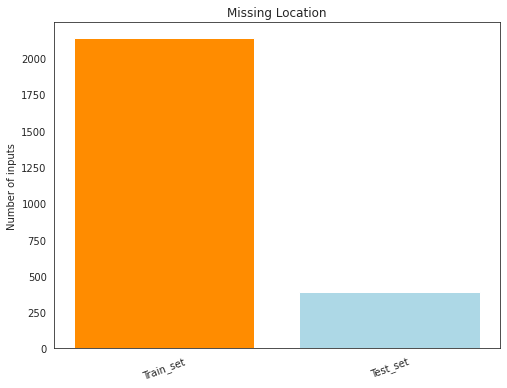

In [10]:
missingLocationTrain = df_train.location.isnull().sum(axis = 0)
missingLocatioTtest = df_test.location.isnull().sum(axis = 0)

#plot NaN proportion for Keyword
plt.rcParams['figure.figsize'] = (8, 6)
x = np.arange(2)
plt.bar(x,[missingLocationTrain, missingLocatioTtest], color=['darkorange','lightblue'])
plt.ylabel('Number of inputs')
plt.title('Missing Location')
plt.xticks(x, ('Train_set', 'Test_set'), rotation=20)
plt.show()

###Check the distribution: 

Identify the proportion between real disasters and not real disasters in the train set.

In [11]:
realDisaster = df_train[df_train['target'] == 1].shape[0]
notRealDisaster = df_train[df_train['target'] == 0].shape[0]

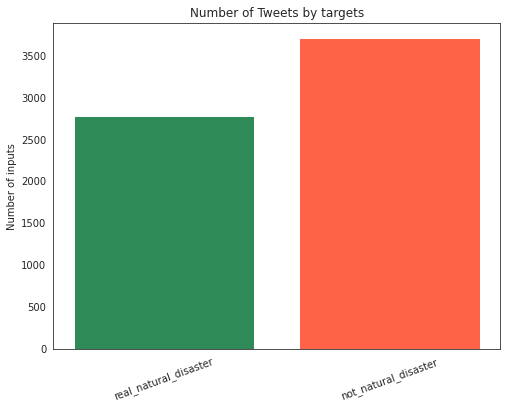

In [12]:
#Plot the result
plt.rcParams['figure.figsize'] = (8, 6)
x = np.arange(2)
plt.bar(x,[realDisaster, notRealDisaster], color=['seagreen','tomato'])
plt.ylabel('Number of inputs')
plt.title('Number of Tweets by targets')
plt.xticks(x, ('real_natural_disaster', 'not_natural_disaster'), rotation=20)
plt.show()

Identify which keywords are most related with a real disaster and which one are not. 

In [13]:
# Top 15 for real Natural disasters

keywordRealTop = df_train['keyword'].loc[(df_train['target'] == 1)].value_counts()[0:15]

# Top 15 for not real Natural disasters

keywordNotRealTop = df_train['keyword'].loc[(df_train['target'] == 0)].value_counts()[0:15]

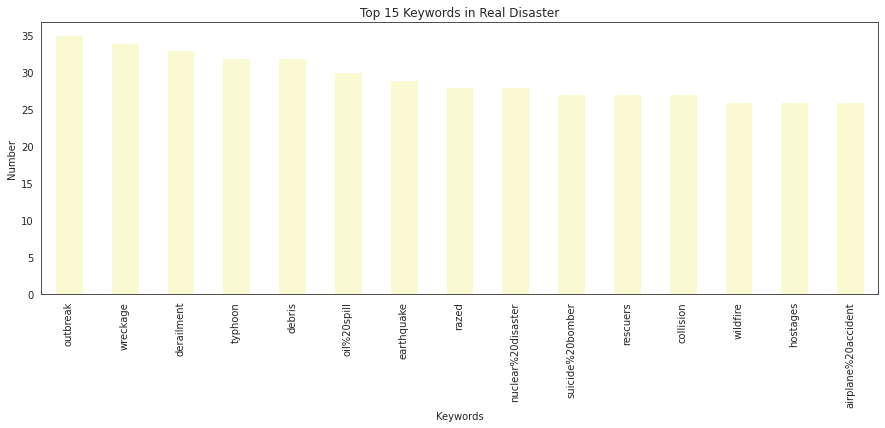

In [14]:
#PLot top 15 real
keywordRealTop.plot.bar(xlabel = 'Keywords', 
                          ylabel = 'Number', 
                          title = 'Top 15 Keywords in Real Disaster', 
                          figsize=(15, 5), 
                          color = 'lightgoldenrodyellow')

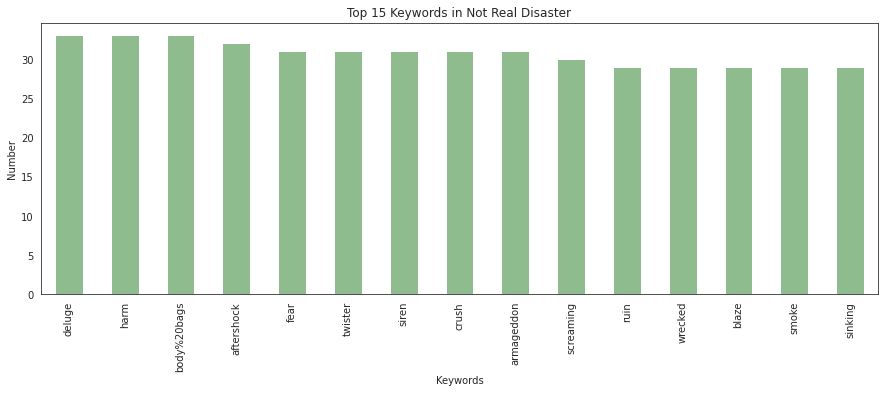

In [15]:
#PLot top 15 not real
keywordNotRealTop.plot.bar(xlabel = 'Keywords', 
                          ylabel = 'Number', 
                          title = 'Top 15 Keywords in Not Real Disaster',
                          figsize=(15, 5), 
                          color = 'darkseagreen')

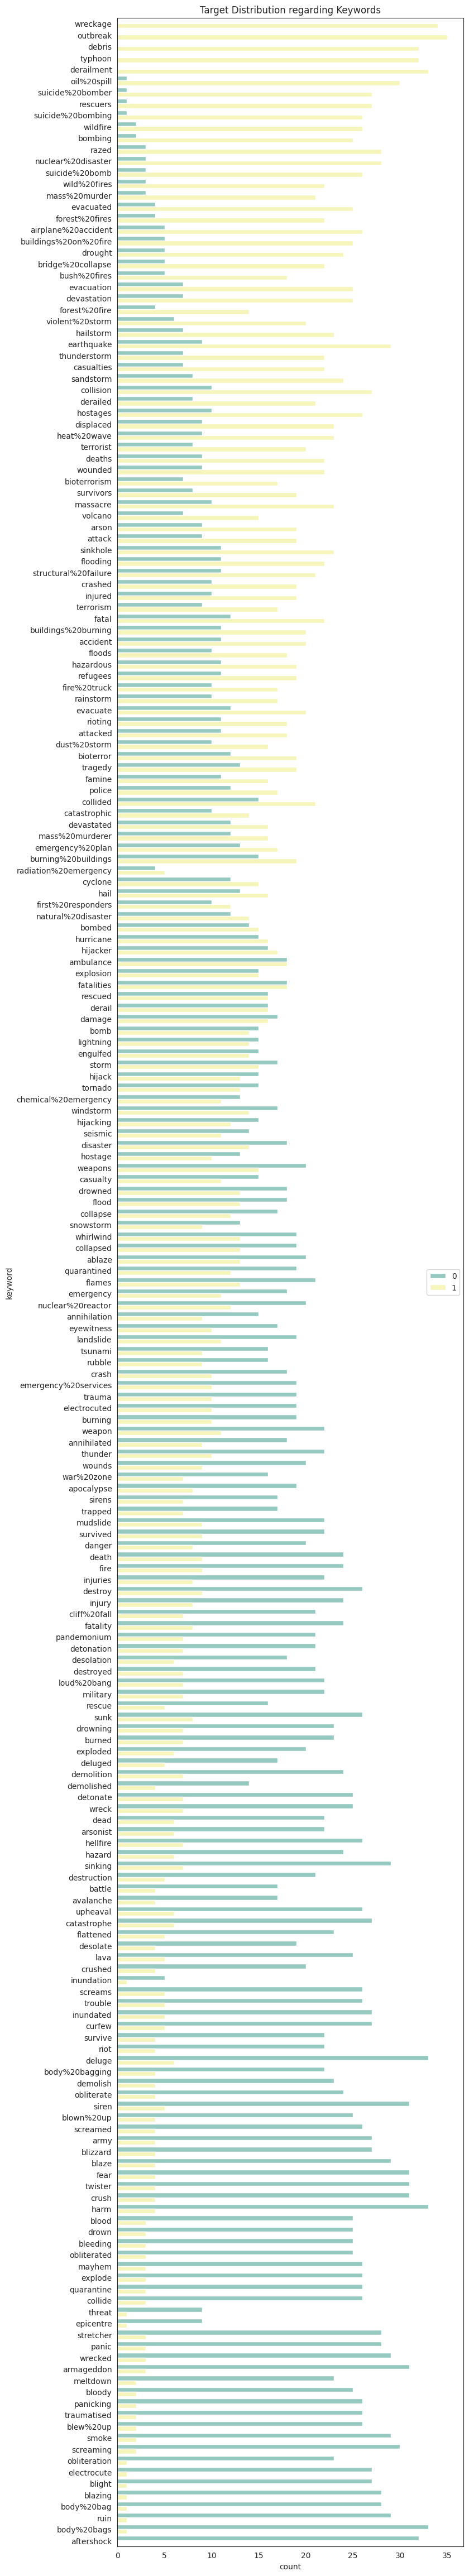

In [16]:
#Identify which Keywords are mainly related to a specific target and which ones are ambigous 

df_train['targetM'] = df_train.groupby('keyword')['target'].transform('mean')

figKey = plt.figure(figsize=(8, 60), dpi=100)

sns.countplot(y=df_train.sort_values(by='targetM', ascending=False)['keyword'],
              hue=df_train.sort_values(by='targetM', ascending=False)['target'],palette="Set3")

plt.legend()
plt.title('Target Distribution regarding Keywords')

plt.show()

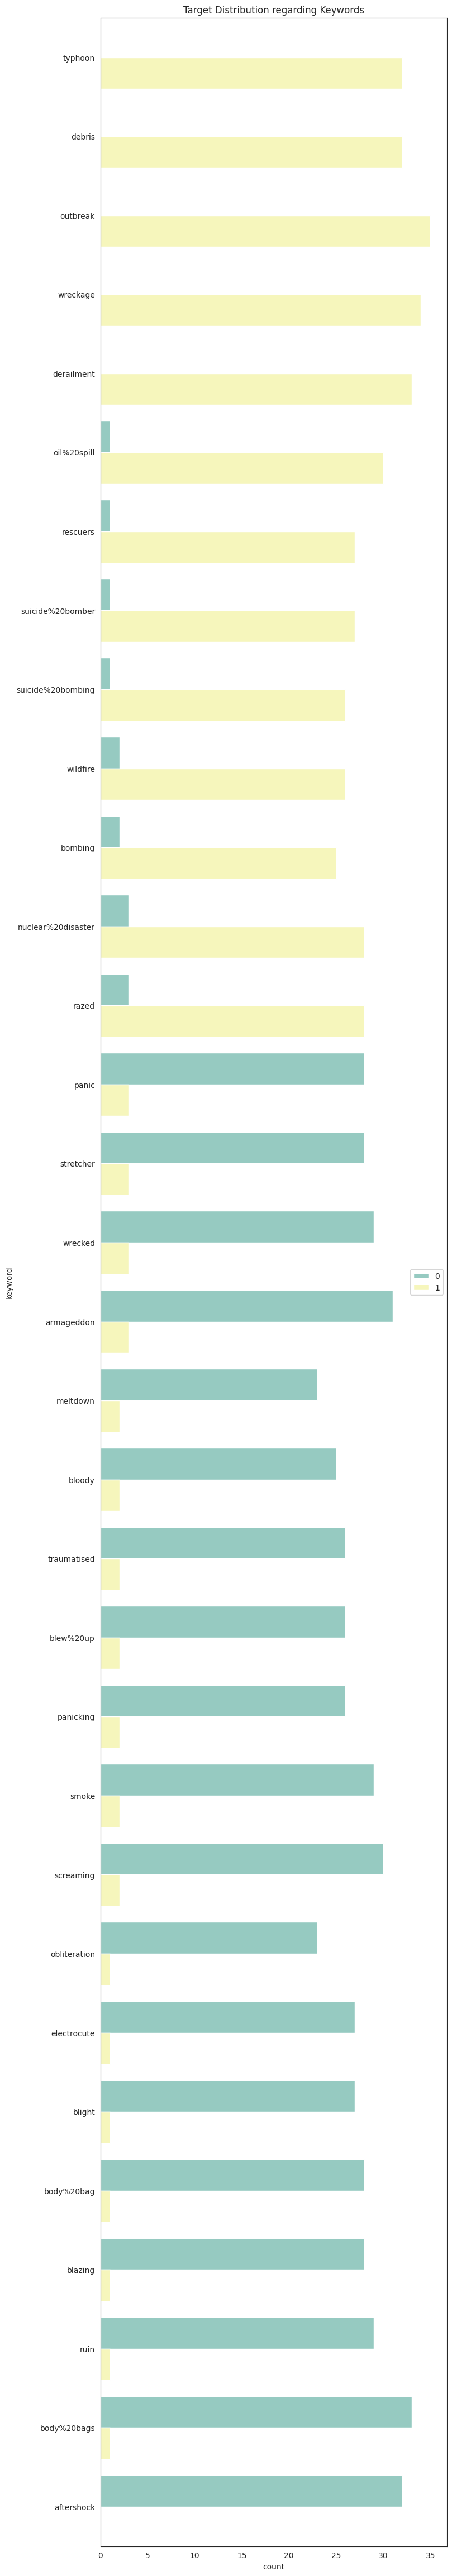

In [17]:
df_train_selected = df_train[(df_train['targetM'] > 0.9) | (df_train['targetM'] < 0.1)]

figKey = plt.figure(figsize=(8, 60), dpi=100)

sns.countplot(y=df_train_selected.sort_values(by='targetM', ascending=False)['keyword'],
              hue=df_train_selected.sort_values(by='targetM', ascending=False)['target'],palette="Set3")

plt.legend()
plt.title('Target Distribution regarding Keywords')

plt.show()

In [18]:
keywords_list = df_train_selected['keyword'].unique()
file_name = 'keywords_list.pkl'

import pickle

def save_file_pkl(file, file_name):
  # Store data (serialize)
  with open(file_name, 'wb') as handle:
      pickle.dump(file, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_file_pkl(file_name):
  # Load data (deserialize)
  with open(file_name, 'rb') as handle:
    return pickle.load(handle)

save_file_pkl(keywords_list, file_name)

df_train.drop(columns=['targetM'], inplace=True)

In [19]:
list(keywords_list)

['panicking',
 'suicide%20bombing',
 'body%20bags',
 'blight',
 'armageddon',
 'stretcher',
 'razed',
 'ruin',
 'wreckage',
 'derailment',
 'bombing',
 'nuclear%20disaster',
 'panic',
 'obliteration',
 'blazing',
 'typhoon',
 'outbreak',
 'wrecked',
 'oil%20spill',
 'rescuers',
 'debris',
 'wildfire',
 'aftershock',
 'meltdown',
 'bloody',
 'traumatised',
 'electrocute',
 'smoke',
 'screaming',
 'body%20bag',
 'suicide%20bomber',
 'blew%20up']

### Analyzing the "location" feature 

In [69]:
df_train.location.value_counts()[0:20]

USA                 91
New York            59
United States       46
London              39
Canada              25
UK                  24
Los Angeles, CA     23
Nigeria             22
India               21
Mumbai              20
Washington, DC      20
Australia           17
Kenya               16
Chicago, IL         15
California          14
Everywhere          14
Worldwide           14
Washington, D.C.    13
Florida             13
New York, NY        13
Name: location, dtype: int64

In [68]:
# Top 15 for real disaster
locationRealTop = df_train['location'].loc[(df_train['target'] == 1)].value_counts()[0:15]
# Top 15 for not real disaster
locationNotRealTop = df_train['location'].loc[(df_train['target'] == 0)].value_counts()[0:15]


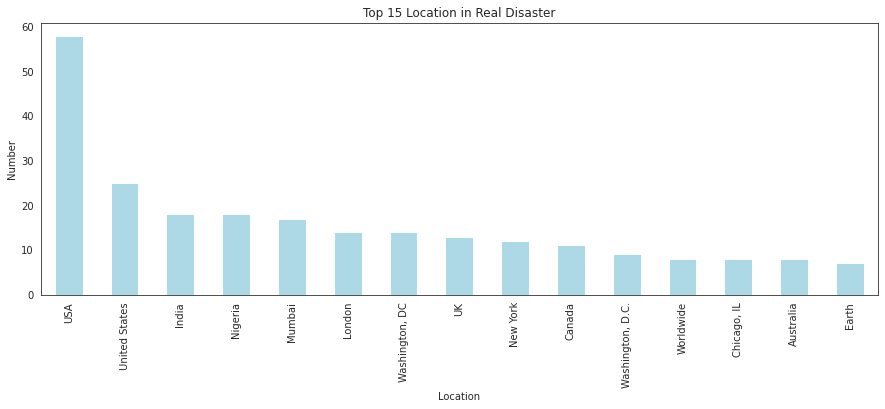

In [70]:
locationRealTop.plot.bar(xlabel = 'Location', 
                          ylabel = 'Number', 
                          title = 'Top 15 Location in Real Disaster', 
                          figsize=(15, 5), 
                          color = 'lightblue')

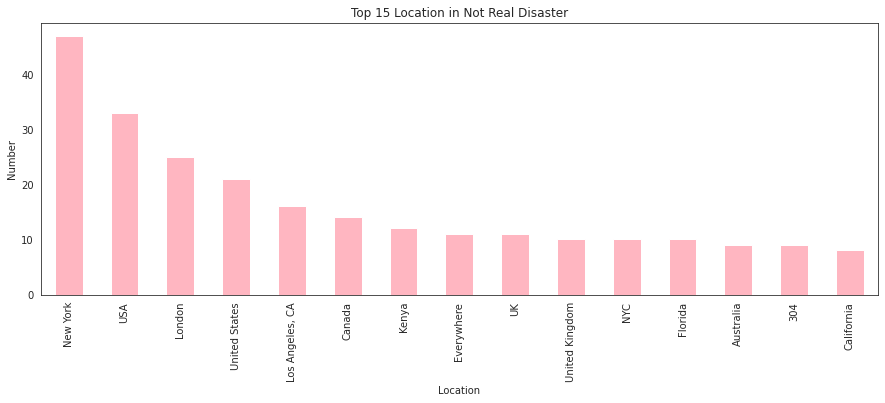

In [66]:
locationNotRealTop.plot.bar(xlabel = 'Location', 
                          ylabel = 'Number', 
                          title = 'Top 15 Location in Not Real Disaster', 
                          figsize=(15, 5), 
                          color = 'lightpink')

### EDA on "text" feature 

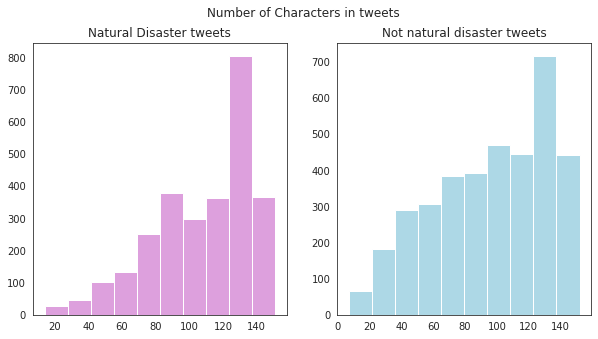

In [23]:
#number of characters in a Tweet 
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

tweetRealTrain = df_train[df_train['target']==1]['text'].str.len()
ax1.hist(tweetRealTrain,color='plum')
ax1.set_title('Natural Disaster tweets')

tweetNotRealTrain = df_train[df_train['target']==0]['text'].str.len()
ax2.hist(tweetNotRealTrain,color='lightblue')
ax2.set_title('Not natural disaster tweets')
fig.suptitle('Number of Characters in tweets')
plt.show()

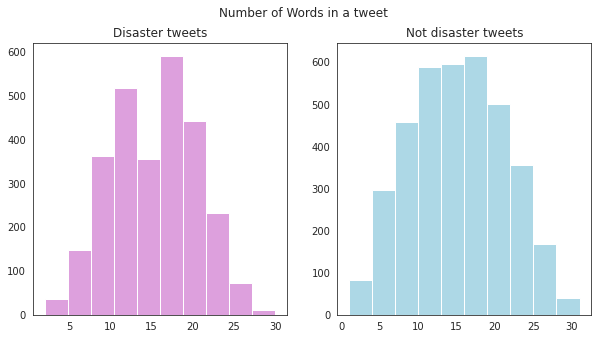

In [24]:
#number of words in a Tweet 
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweetReal = df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweetReal,color='plum')
ax1.set_title('Disaster tweets')

tweetNotReal = df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweetNotReal,color='lightblue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Number of Words in a tweet')

plt.show()

In [25]:
#Find most common words on Tweets 
import nltk
from nltk import tokenize

tokenSpace = tokenize.WhitespaceTokenizer()

def counter_common_words(text, columnText, quantity, title):
    allWords = ' '.join([text for text in text[columnText]])
    tokenizedPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenizedPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="Set3")
    ax.set(ylabel = "Count")
    plt.title(title)
    plt.xticks(rotation='horizontal')
    plt.show()

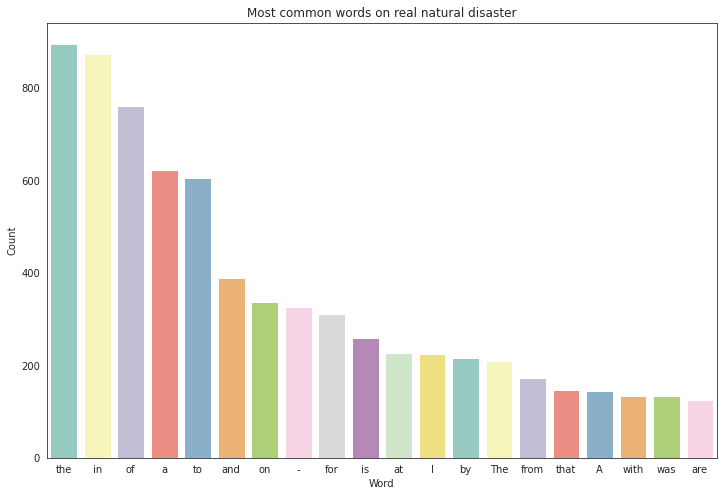

In [26]:
counter_common_words(df_train[df_train['target'] == 1], 'text', 20, 'Most common words on real natural disaster')

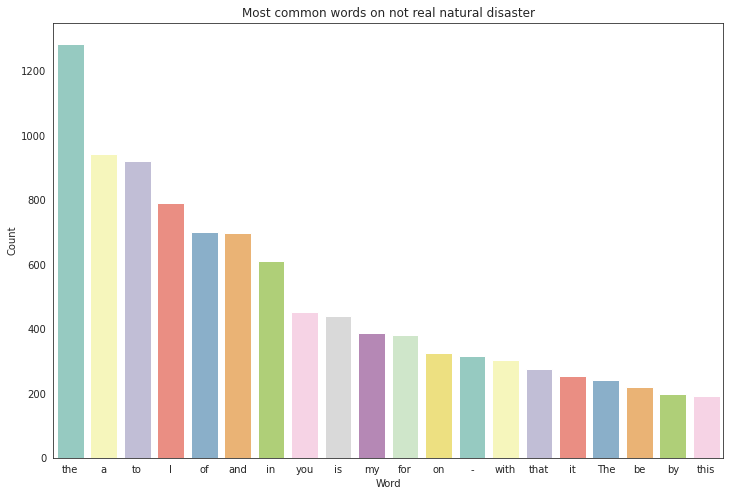

In [27]:
counter_common_words(df_train[df_train['target'] == 0], 'text', 20, 'Most common words on not real natural disaster')

# Bigrame

In [28]:
import spacy
import string

# Load English language model
sp = spacy.load('en_core_web_sm')

# Create a list of punctuation marks
punctuations = string.punctuation

# Create a list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def tokenize_function(text):
    # Create token object, which is used to create documents with linguistic annotations.
    sp_obj = sp(text)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in sp_obj ]

    ## Remove stop words and punctuation
    #mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    return mytokens

In [29]:
from nltk.util import ngrams
import collections

corpus = []
for text in [list(df_train['text']), list(df_test['text'])]:
  for string in text:
    corpus.extend(tokenize_function(string))

collections.Counter(ngrams(corpus, 1)).most_common(30)

Bigrams = ngrams(corpus, 2)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(Bigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esBigramFreq.most_common(30)

[(('?', '?'), 1879),
 (('i', 'be'), 374),
 (('in', 'the'), 306),
 (('&', 'amp'), 298),
 (('amp', ';'), 298),
 (('it', 'be'), 277),
 (('!', '!'), 268),
 (('do', 'not'), 259),
 (('be', 'a'), 258),
 (('of', 'the'), 254),
 (('', '#'), 198),
 (('.', '#'), 192),
 (('.', ''), 188),
 (('be', 'the'), 151),
 (('.', 'i'), 146),
 (('be', 'not'), 146),
 (('you', 'be'), 131),
 (('on', 'the'), 129),
 (('like', 'a'), 129),
 (('to', 'the'), 125),
 (('go', 'to'), 124),
 (('have', 'be'), 123),
 (('i', 'have'), 119),
 (('to', 'be'), 114),
 (('in', 'a'), 113),
 (('can', 'not'), 107),
 (('there', 'be'), 106),
 (('?', '#'), 104),
 (('for', 'the'), 97),
 (('have', 'a'), 96)]

### Data cleaning 

What we want to do: 

On Keywords: 
- Removing spelling errors (%20, spelling...)
- Regroupments

On Tweets: 
- Spelling correction 
- Remove Http 
- Remove HTML 
- Remove punctuation 
- Remove #
- Remove @
- Remove stopwords 

On Locations: 
- Harmonize



